# [Exploration 12] GAN (Generative Adversarial Network)

ÏûëÏóÖÌôòÍ≤Ω Íµ¨ÏÑ±

`$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/generated_samples`   
`$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_checkpoints`   
`$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_history`

# STEP 1. Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±ÌïòÍ∏∞

Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import os
import glob
import time

import PIL
import imageio

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.2.0


In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî

In [3]:
train_x = (train_x - 127.5) / 127.5

In [4]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [5]:
train_x.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


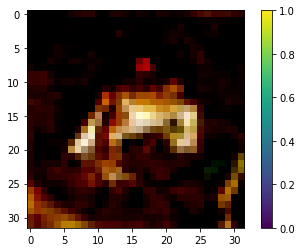

In [6]:
plt.imshow(train_x[0].reshape(32, 32, 3))
plt.colorbar()
plt.show()

train_y Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Ïò§ÏßÄ ÏïäÏïÑÏÑú Ïù¥Í≤å Î≠îÏßÄ ÏïåÏàòÍ∞Ä ÏóÜÎã§..   
(Ïô†ÏßÄ Î¨¥ÏÑ≠Îã§)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

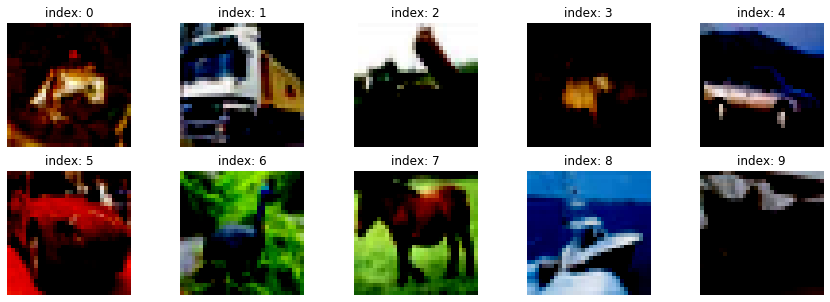

In [7]:
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

10Í∞ú ÌôïÏù∏Ìï¥Î≥¥Í∏∞

In [8]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# STEP 2. ÏÉùÏÑ±Ïûê Î™®Îç∏ Íµ¨ÌòÑÌïòÍ∏∞

In [10]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(2, 2), strides=(2, 2), padding='valid', use_bias=False, \
                                     activation='tanh'))

    return model

generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       294912    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0

In [11]:
generator = make_generator_model()

generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 128)       294912    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 128)      

keras sequential Î™®Îç∏Î°ú Î†àÏù¥Ïñ¥Î•º Íµ¨ÏÑ±ÌïúÎã§. Ï¥ù 4Ï∏µÏùò Î†àÏù¥Ïñ¥Í∞Ä ÎßåÎì§Ïñ¥ÏßÄÎäîÎç∞, ÎßàÏßÄÎßâ Îã®Í≥ÑÏóêÏÑú ÏûÖÎ†•Ïù¥ÎØ∏ÏßÄÏôÄ Í∞ôÏùÄ ÌòïÏÉÅÏù∏ 32x32x3 Ïùò ÌòïÌÉúÍ∞Ä ÎßåÎì§Ïñ¥ÏßÄÎèÑÎ°ù ÌïúÎã§.

In [12]:
noise = tf.random.normal([1, 100])

Î™®Îç∏Ïù¥ Ïûò ÎßåÎì§Ïñ¥Ï°åÎã§Î©¥ ÎûúÎç§Î≤°ÌÑ∞Î•º ÏûÖÎ†•ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§.

In [13]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

TensorShape([1, 32, 32, 3]) Ïùò Ïïû 1ÏùÄ batch_sizeÍ∞Ä 1Ïù¥ÎùºÎäî ÎúªÏù¥Îã§.

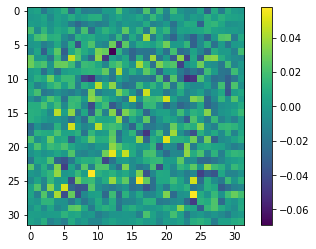

In [14]:
plt.imshow(generated_image[0, :, :,0])
plt.colorbar()
plt.show()

Îã§ÏñëÌïú ÏÉâÏù¥ ÏÑûÏù∏ 32x32Ïùò ÎÖ∏Ïù¥Ï¶à Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÎã§. ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú Ïù¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä Ïñ¥Îñ§ÏãùÏúºÎ°ú Î≥ÄÌï¥Í∞ÄÎäîÏßÄ ÏßÄÏºúÎ≥¥Ïûê.

# STEP 3. ÌåêÎ≥ÑÏûê Î™®Îç∏ Íµ¨ÌòÑÌïòÍ∏∞

In [15]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

ÌåêÎ≥ÑÏûê Î™®Îç∏ÏùÄ ÏÉùÏÑ±ÏûêÏóêÏÑú ÎûúÎç§ÏúºÎ°ú ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏßÑÏßúÏù∏ÏßÄ Í∞ÄÏßúÏù∏ÏßÄÎ•º Íµ¨Î∂ÑÌïòÎäî Ïó≠Ìï†ÏùÑ ÌïúÎã§.   
ÏûÖÎ†•ÏúºÎ°ú 32x32 Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Î•º Î∞õÍ≥†, Ï∂úÎ†•Í∞íÏúºÎ°úÎäî ÏßÑÏßú or Í∞ÄÏßúÎ•º ÌåêÎ≥ÑÌïòÎäî 1Ï∞®ÏõêÏùò Í∞íÏù¥ ÎêúÎã§.

ÎûúÎç§Ìïú ÎÖ∏Ïù¥Ï¶àÎ•º ÎÑ£Ïñ¥ ÏÉùÏÑ±Ìïú Ïù¥ÎØ∏ÏßÄÏù∏ `generated_image`Î•º ÎÑ£Ïñ¥ Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§.

In [16]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00560312]], dtype=float32)>

1, 1Ïùò shapeÏù¥ Î≥¥Ïù¥Í≥†, ndarrayÌòïÌÉúÍ∞Ä Î≥¥Ïù∏Îã§.

# STEP 4. ÏÜêÏã§Ìï®ÏàòÏôÄ ÏµúÏ†ÅÌôî Ìï®Ïàò Íµ¨ÌòÑÌïòÍ∏∞

Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú Í∞ÄÏû• Ïñ¥Î†§Ïõ†Îçò Î∂ÄÎ∂ÑÏù¥ ÏÜêÏã§Ìï®Ïàò, ÏµúÏ†ÅÌôîÌï®ÏàòÎ•º Íµ¨ÌòÑÌïòÎäî Î∂ÄÎ∂ÑÏù¥ÏóàÎã§.   
ÌïòÎÇòÌïòÎÇòÏî© Ï∞®Í∑ºÏ∞®Í∑º ÌíÄÏñ¥Î≥¥Í≤†Îã§.

## 1. ÏÜêÏã§Ìï®Ïàò

Î®ºÏ†Ä ÏÜêÏã§Ìï®ÏàòÎ°úÎäî **ÍµêÏ∞® ÏóîÌä∏Î°úÌîº(Cross Entropy)**Î•º ÏÇ¨Ïö©ÌïúÎã§. ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÎäî Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú **MSE**ÎåÄÏã† ÎßéÏù¥ ÏÇ¨Ïö©ÎêúÎã§.   
Í∑∏Ï§ëÏóêÏÑúÎèÑ Ïö∞Î¶¨Îäî ÌåêÎ≥ÑÏûêÎ•º ÌÜµÌï¥ ÏßÑÏßúÏù∏ÏßÄ Í∞ÄÏßúÏù∏ÏßÄÎ•º ÌåêÎ≥ÑÌïòÎäî  **Ïù¥Ìï≠ ÍµêÏ∞® ÏóîÌä∏Î°úÌîº(Binary Cross Entropy)**Î•º ÏÇ¨Ïö©ÌïúÎã§. 

In [17]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

`cross_entropy`Ìï®ÏàòÎ•º ÏºÄÎùºÏä§Î•º ÌÜµÌï¥ Î∂àÎü¨Ïò®Îã§. (`from_logits`Í∞íÏùÄ **True**Î°ú Ï£ºÏñ¥Ïïº Ìï®Ïàò ÎÇ¥Î∂ÄÏóêÏÑú **sigmoid**Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ 0 ~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî ÏãúÏºúÏ§Ñ Ïàò ÏûàÎã§.

Îã§ÏùåÏúºÎ°úÎäî `tf.ones.like()`ÏôÄ `tf.zeros_like()`Î•º ÌôúÏö©Ìï¥ÏÑú **fake_output (fake imageÎ•º ÌåêÎ≥ÑÌïú Í∞í)**Í≥º real_output (real imageÎ•º ÌåêÎ≥ÑÌïú Í∞í)**ÏùÑ ÎπÑÍµêÌïòÎèÑÎ°ù ÌïúÎã§.

### 1 - (1) ÏÉùÏÑ±Ïûê ÏÜêÏã§Ìï®Ïàò (generator_loss)

In [18]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

ÏÉùÏÑ±Ïûê ÏÜêÏã§Ìï®ÏàòÎäî Í∞ÄÏßú Ïù¥ÎØ∏ÏßÄÏùò ÌåêÎ≥ÑÍ∞íÏù∏ `fake_output`Ïù¥ 1Ïù¥ ÎêòÏñ¥Ïïº ÌïòÎäî Î™©ÌëúÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.   
Í∑∏Îü¨ÎØÄÎ°ú `tf.ones_like`Î•º ÏÇ¨Ïö©ÌïòÏó¨ fake_outputÍ≥ºÏùò ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÍ∞Ä ÎÇÆÏïÑÏßà Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§.

### 1 - (2) ÌåêÎ≥ÑÏûê ÏÜêÏã§Ìï®Ïàò (discriminator_loss)

In [19]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

ÌåêÎ≥ÑÏûê ÏÜêÏã§Ìï®ÏàòÎäî **real_loss**ÏôÄ **fake_loss**Î°ú Íµ¨Î∂ÑÎêúÎã§.   
**real_loss**Îäî ÌåêÎ≥ÑÏûêÎ•º ÌÜµÌï¥ ÎÇòÏò® **real_output** Í∞íÏù¥ 1Ïù¥ ÎêòÏñ¥Ïïº ÌïòÎäî ÏÜêÏã§Ìï®ÏàòÏù¥Î©∞,   
**fake_loss**Îäî ÌåêÎ≥ÑÏûêÎ•º ÌÜµÌï¥ ÎÇòÏò® **fake_output** Í∞íÏù¥ 0Ïù¥ ÎêòÏñ¥Ïïº ÌïòÎäî ÏÜêÏã§Ìï®ÏàòÏù¥Îã§.   
**total_loss**Îäî Ïù¥ ÎëòÏùÑ ÎçîÌïú Í∞íÏù¥Îã§.

### 1 - (3) ÌåêÎ≥ÑÏûê Ï†ïÌôïÎèÑ (discriminator accuracy)

ÌåêÎ≥ÑÏûê(discriminator)Îäî Ï†ÅÏ†àÌïú Í∞ÄÏ§ëÏπò ÌïôÏäµÏùÑ ÏúÑÌï¥ lossÎ•º Íµ¨ÌïòÎäî Í≤ÉÎèÑ Ï§ëÏöîÌïòÏßÄÎßå, ÏñºÎßàÎÇò Ï†ïÌôïÌûà ÌåêÎ≥ÑÌïòÎäîÏßÄ **accuracy**Î•º Íµ¨ÌïòÎäî Í≤ÉÎèÑ Ï§ëÏöîÌïòÎã§.

In [20]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

## 2. ÏµúÏ†ÅÌôî Ìï®Ïàò(optimizer)

ÏµúÏ†ÅÌôî Ìï®ÏàòÎäî **Adam**ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ§Ï†ïÌï¥Î≥¥Í≤†Îã§.

In [21]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

ÎÖ∏ÎìúÏóêÏÑúÎäî Îî∞Î°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ∏∞Ïóê Í∞ÅÍ∞ÅÏùò optimizerÍ∞Ä ÌïÑÏöîÌïòÎã§Í≥† ÎÇòÏò§ÎäîÎç∞ Ïûò Ïù¥Ìï¥Í∞Ä ÎêòÏßÄÎäî ÏïäÎäîÎã§.

# STEP 5. ÌõàÎ†®Í≥ºÏ†ï ÏÉÅÏÑ∏ Í∏∞Îä• Íµ¨ÌòÑÌïòÍ∏∞

ÌïôÏäµ Í≥ºÏ†ïÏóê Îì§Ïñ¥Í∞ÄÍ∏∞Ï†ÑÏóê ÏÑ§Ï†ïÏùÑ Ìï¥Îë¨ÏïºÌï† Î∂ÄÎ∂ÑÏù¥ ÏûàÎã§.   
Ïù∏ÌíãÍ∞íÏúºÎ°ú ÎûúÎç§Ìïú ÎÖ∏Ïù¥Ï¶àÎ•º ÏûÖÎ†•ÌïòÍ≤å ÎêòÎäîÎç∞, Í≥†Ï†ïÎêú Í∞íÏùÑ ÏûÖÎ†•Ìï¥Ï§òÏïº ÏßÑÏ†Ñ Í≥ºÏ†ïÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.   
Í∑∏Îü¨ÎØÄÎ°ú, (16, 100) ÌòïÏÉÅÏùò Î≤°ÌÑ∞Î•º Í≥†Ï†ïÌï¥ÎëîÎã§.

In [22]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

1Í∞úÏùò ÎØ∏ÎãàÎ∞∞ÏπòÏùò ÌõàÎ†®Í≥ºÏ†ïÏùÑ Ï≤òÎ¶¨ÌïòÎäî train_step() Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïúÎã§.

In [23]:
@tf.function
def train_step(images):  #(1) ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) ÏÉùÏÑ±Ïûê ÏûÖÎ†• ÎÖ∏Ïù¥Ï¶à

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() Ïò§Ìîà
        generated_images = generator(noise, training=True)  #(4) generated_images ÏÉùÏÑ±

        #(5) discriminator ÌåêÎ≥Ñ
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss Í≥ÑÏÇ∞
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy Í≥ÑÏÇ∞
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient Í≥ÑÏÇ∞
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) Î™®Îç∏ ÌïôÏäµ
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) Î¶¨ÌÑ¥Í∞í

(1) ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞: Real Image Ïó≠Ìï†ÏùÑ Ìï† images Ìïú ÏÑ∏Ìä∏Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏùå    

(2) ÏÉùÏÑ±Ïûê ÏûÖÎ†• ÎÖ∏Ïù¥Ï¶à : generatorÍ∞Ä FAKE IMAGEÎ•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌïú noiseÎ•º images Ìïú ÏÑ∏Ìä∏ÏôÄ Í∞ôÏùÄ ÌÅ¨Í∏∞Ïù∏ BATCH_SIZE ÎßåÌÅº ÏÉùÏÑ±Ìï®    

(3) tf.GradientTape()Îäî Í∞ÄÏ§ëÏπò Í∞±Ïã†ÏùÑ ÏúÑÌïú GradientÎ•º ÏûêÎèô ÎØ∏Î∂ÑÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ with Íµ¨Î¨∏ Ïó¥Í∏∞    

(4) generated_images ÏÉùÏÑ± : generatorÍ∞Ä noiseÎ•º ÏûÖÎ†•Î∞õÏùÄ ÌõÑ generated_images ÏÉùÏÑ±    

(5) discriminator ÌåêÎ≥Ñ : discriminatorÍ∞Ä Real ImageÏù∏ imagesÏôÄ Fake ImageÏù∏ generated_imagesÎ•º Í∞ÅÍ∞Å ÏûÖÎ†•Î∞õÏùÄ ÌõÑ     
real_output, fake_output Ï∂úÎ†•
(6) loss Í≥ÑÏÇ∞ : fake_output, real_outputÏúºÎ°ú generatorÏôÄ discriminator Í∞ÅÍ∞ÅÏùò loss Í≥ÑÏÇ∞    

(7) accuracy Í≥ÑÏÇ∞ : fake_output, real_outputÏúºÎ°ú discriminatorÍ∞Ä Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞    

(8) gradient Í≥ÑÏÇ∞ : gen_tapeÏôÄ disc_tapeÎ•º ÌôúÏö©Ìï¥ gradientÎ•º ÏûêÎèôÏúºÎ°ú Í≥ÑÏÇ∞   

(9) Î™®Îç∏ ÌïôÏäµ : Í≥ÑÏÇ∞Îêú gradientÎ•º optimizerÏóê ÏûÖÎ†•Ìï¥ Í∞ÄÏ§ëÏπò Í∞±Ïã†   

(10) Î¶¨ÌÑ¥Í∞í : Ïù¥Î≤à Ïä§ÌÖùÏóê Í≥ÑÏÇ∞Îêú lossÏôÄ accuracyÎ•º Î¶¨ÌÑ¥

### ÏÉùÏÑ±Ìïú Ïù¥ÎØ∏ÏßÄÎ•º ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌïú Ìï®ÏàòÎ•º Íµ¨ÌòÑ

Ï≤òÏùå Ïù¥ÎØ∏ÏßÄ ÏÉòÌîåÏùÑ ÌôïÏù∏ÌñàÎçòÍ≤ÉÍ≥º ÎèôÏùºÌïòÍ≤å ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÎ•º ÏãúÍ∞ÅÌôî Ìï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïúÎã§.

In [24]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i], cmap='gray')
        plt.axis('off')

    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

Îã§ÏùåÏúºÎ°úÎäî Î°úÏä§ÏôÄ Ï†ïÌôïÎèÑÏùò ÌûàÏä§ÌÜ†Î¶¨Î•º ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû• ÌõÑ Îß§ epochÎßàÎã§ Í∑∏matplotlibÏúºÎ°ú Í∑∏ÎûòÌîÑÌôî Ìï†Ïàò ÏûàÎèÑÎ°ù Ìï®ÏàòÎ•º ÎßåÎì†Îã§.

In [25]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 15,6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history ÎîîÎ†âÌÜ†Î¶¨Ïóê epochÎ≥ÑÎ°ú Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

Îã§ÏùåÏúºÎ°úÎäî Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º ÌôúÏö©ÌïòÏó¨ Î≤ÑÏ†ÑÍ¥ÄÎ¶¨Î•º Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§.   

In [26]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# STEP 6. ÌïôÏäµ Í≥ºÏ†ï ÏßÑÌñâÌïòÍ∏∞

Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú Íµ¨ÌòÑÌïú Ìï®ÏàòÎì§ÏùÑ Î™®Îëê ÏÇ¨Ïö©ÌïòÏó¨ ÌïúÎ≤àÏóê ÌïôÏäµÌï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïòÎèÑÎ°ù ÌïúÎã§.

In [27]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [28]:
save_every = 1
EPOCHS = 100

ÏóêÌè≠Í∞íÏùÄ 100ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥† ÌïôÏäµÏùÑ ÏãúÎèÑÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†Îã§.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

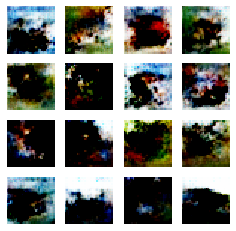

Time for training : 1039 sec


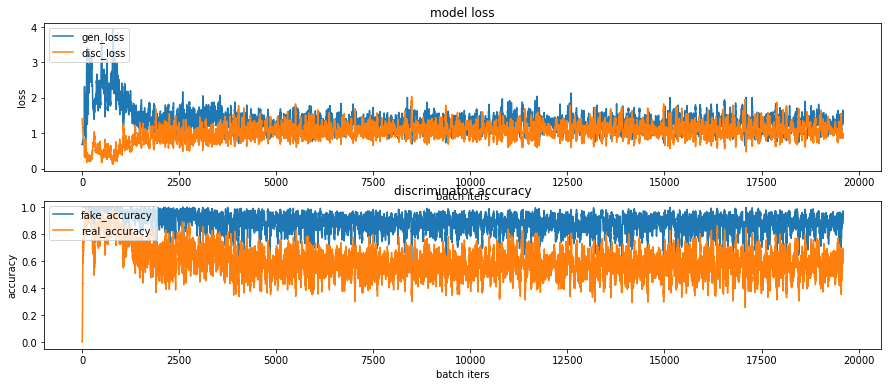

CPU times: user 17min 3s, sys: 54.8 s, total: 17min 57s
Wall time: 17min 20s


In [29]:
%%time
train(train_dataset, EPOCHS, save_every)

ÎèôÎ¨º Í∑∏Î¶ºÍ≥º Ï¥àÎ°ùÏÉâ ÏûêÏó∞Ïù¥ Ïñ¥Ïö∞Îü¨Ï†∏ÏûàÎäî Í≤ÉÍ∞ôÏùÄ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±ÎêòÍ∏¥ ÌñàÎã§. ÏóêÌè≠Í∞íÏùÑ Îçî Ïò¨Î¶¨Î©¥ Í≤∞Í≥ºÍ∞Ä ÎÇòÏïÑÏßàÏßÄ Í∂ÅÍ∏àÌïòÎã§.   
ÌïòÏßÄÎßå Îã§Ïùå Ïä§ÌÖùÏóêÏÑú Í≤∞Í≥ºÎ¨ºÏùÑ Îçî Ï¢ãÍ≤å ÎßåÎìúÎäî Î∞©Î≤ïÏóê ÎåÄÌï¥ Í≥†ÎØºÌïòÎäî Ïä§ÌÖùÏù¥ ÏûàÏúºÎØÄÎ°ú Í∑∏Ï™ΩÏóêÏÑú Îçî Í≥†ÎØºÌï¥Î≥¥ÎèÑÎ°ù ÌïúÎã§.

file:///home/aiffel-dj58/aiffel/dcgan_newimage/fashion/cifar10.gif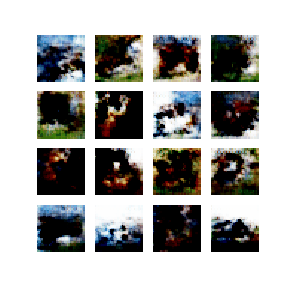

# STEP 7. GAN ÌõàÎ†® Í≥ºÏ†ï Í∞úÏÑ†ÌïòÍ∏∞

ÎßàÏßÄÎßâ Ïä§ÌÖùÏùÄ GANÏúºÎ°ú ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÏùò Í≤∞Í≥ºÎ•º Í∞úÏÑ†Ìï¥Î≥¥Îäî StepÏù¥Îã§.   
ÏïÑÎûò ÎßÅÌÅ¨Î•º Ï∞∏Í≥†ÌïòÏó¨ Í∞úÏÑ†Î∞©Î≤ïÏóê ÎåÄÌï¥ Ï∞∏Í≥†Ìï† Ïàò ÏûàÎã§.   


- [How to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks)   
- [10 Lessons I Learned Training GANs for one Year](https://towardsdatascience.com/10-lessons-i-learned-training-generative-adversarial-networks-gans-for-a-year-c9071159628)   
- [Tips for Training Stable Generative Adversarial Networks](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/)   
- [Improved Techniques for Training GANs(paper)](https://papers.nips.cc/paper/2016/file/8a3363abe792db2d8761d6403605aeb7-Paper.pdf)

 
   
Ïù¥Î≤à ÎÖ∏ÎìúÍ∞Ä ÌäπÎ≥ÑÌñàÎçò ÎßåÌÅº Í≤∞Í≥ºÎ¨ºÏùÑ Í∞úÏÑ†Ìï¥Î≥¥Í≥† Ïã∂ÏßÄÎßå Ï†úÏ∂úÏãúÍ∞ÑÏù¥ Îã§Í∞ÄÏò§Îäî Í¥ÄÍ≥ÑÎ°ú ÏÉùÎûµÌïòÍ∏∞Î°ú ÌïòÍ≤†Îã§ üòìÔ∏è
    
    



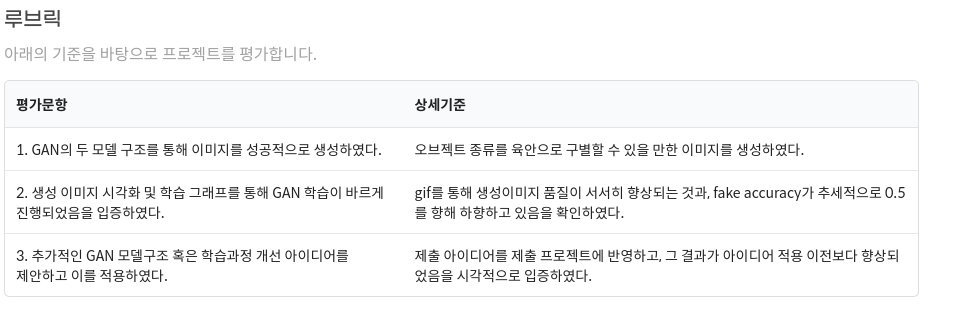

# ÌöåÍ≥†:  
## 1. **Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú Ïñ¥Î†§Ïõ†Îçò Ï†ê**   
- ÏÉùÏÑ±ÏûêÏôÄ ÌåêÎ≥ÑÏûê ÏÜêÏã§Ìï®Ïàò ÏÑ§Ï†ïÌïòÎäî Î∂ÄÎ∂Ñ   
- Î™®Îç∏ Ï∂úÎ†• output ÌÅ¨Í∏∞ ÎßûÏ∂îÎäî Î∂ÄÎ∂Ñ(transposeÍ∞Ä Îì§Ïñ¥Í∞ÄÎãà ÎçîÏö± Ïñ¥Î†§Ïõ†Ïùå)
   
## 2. **ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú ÏïåÏïÑÎÇ∏ Ï†ê ÌòπÏùÄ ÏïÑÏßÅ Î™®Ìò∏Ìïú Ï†ê**   
Î¨¥ÏóêÏÑú Ïú†Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏ§ë ÌïòÎÇòÎ°ú GANÏùÑ Î∞∞Ïõ†ÏßÄÎßå, GAN Ïù¥Ïô∏ÏóêÎèÑ Îã§ÏñëÌïú Î∞©Î≤ïÎì§Ïù¥ ÏûàÏúºÎ©∞, Ï∞ΩÏùòÏ†ÅÏúºÎ°ú ÌôúÏö©ÌïúÎã§Î©¥ Î¨¥Í∂ÅÎ¨¥ÏßÑÌïòÍ≤å ÌôúÏö©Ìï† Ïàò ÏûàÏùå

## 3. **Î£®Î∏åÎ¶≠ ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ ÏãúÎèÑÌïú Í≤ÉÎì§**   
- GANÏùò Îëê Î™®Îç∏ Íµ¨Ï°∞Î•º ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏÉùÏÑ±ÌïòÏòÄÎã§.   
ÌòïÏ≤¥Î•º ÏïåÏïÑÎ≥¥Í∏∞Îäî Ïñ¥Î†µÏßÄÎßå ÏÉùÏÑ±ÏûêÏôÄ ÌåêÎ≥ÑÏûêÎ•º ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏóàÎã§.   
- ÏÉùÏÑ± Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî Î∞è ÌïôÏäµ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ GAN ÌïôÏäµÏù¥ Î∞îÎ•¥Í≤å ÏßÑÌñâÎêòÏóàÏùåÏùÑ ÏûÖÏ¶ùÌïòÏòÄÎã§.   
- Ï∂îÍ∞ÄÏ†ÅÏù∏ GAN Î™®Îç∏Íµ¨Ï°∞ ÌòπÏùÄ ÌïôÏäµÍ≥ºÏ†ï Í∞úÏÑ† ÏïÑÏù¥ÎîîÏñ¥Î•º Ï†úÏïàÌïòÍ≥† Ïù¥Î•º Ï†ÅÏö©ÌïòÏòÄÎã§.   
ÏÉùÎûµÌïòÏòÄÎã§.

   
### 4. **ÎßåÏïΩÏóê Î£®Î∏åÎ¶≠ ÌèâÍ∞Ä Í¥ÄÎ†® ÏßÄÌëúÎ•º Îã¨ÏÑ± ÌïòÏßÄ Î™ªÌñàÏùÑ Îïå, Ïù¥Ïú†Ïóê Í¥ÄÌïú Ï∂îÏ†ï**   
ÏÉùÍ∞ÅÎ≥¥Îã§ Î™®Îç∏ ÏïÑÏõÉÌíãÏùÑ ÎßûÏ∂îÎäî Î∂ÄÎ∂ÑÏù¥ Ïñ¥Î†§Ïõ†Îã§. transposeÎ•º ÌïòÏßÄ ÏïäÏïòÏùÑ ÎïåÎäî Ïù∏ÌíãÍ≥º ÎèôÏùºÌïú ÏïÑÏõÉÌíãÏùÑ Ï∂úÎ†•Ìï† Ïàò ÏûàÎäî Í≥µÏãùÏù¥ ÏûàÏßÄÎßå TransposeÏùò Í≤ΩÏö∞ÏóêÎäî Ï∞æÏïÑÎèÑ ÎÇòÏò§ÏßÄ ÏïäÏïÑ Ï∂úÎ†•Í∞íÏùÑ ÎñÑÎ†§ÎßûÏ∑ÑÎã§.
   
### 5. **ÏûêÍ∏∞ Îã§Ïßê**   
GANÏùÄ Îã§ÏãúÌïúÎ≤à Íº≠ Î≥µÏäµÌïòÏó¨ Ï¢ãÏùÄ Í≤∞Í≥ºÎ¨ºÏùÑ ÎÇ¥Î≥¥Í≥†Ïã∂ÏùÄ ÎÖ∏ÎìúÏ§ë ÌïòÎÇòÏù¥Îã§. Îòê CV Î∂ÑÏïº Ï§ë, ÌôúÏö©Ìï† Ïàò ÏûàÎäî Î∂ÄÎ∂ÑÏù¥ ÎßéÏùÑ Í≤ÉÏù¥Îùº ÏÉùÍ∞ÅÌïúÎã§. Ï£ºÎßêÏùÑ ÌÜµÌï¥ Îçî Î≥µÏäµÌïòÍ≥† Í≥µÎ∂ÄÌïòÏó¨ Ïù¥ÌõÑÏóê ÏûàÏùÑ GAN ÎÖ∏ÎìúÏóêÏÑúÎäî Íº≠ Ï¢ãÏùÄ Í≤∞Í≥ºÎ¨ºÏùÑ ÎÇ¥Î≥¥Ïù¥Í≥† Ïã∂Îã§.

   